In [2822]:
# Importar librerías
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("earthquake_1995-2023.csv")
#en la escala de Richter, un terremoto se considera significativo a partir de una magnitud de 3.5.
umbral_terremoto = 6.8
df['terremoto'] = np.where(df['magnitude'] >= umbral_terremoto, 1, 0)


In [2823]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#df.head()
df.head()


,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country,terremoto
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16-08-2023 12:47,7,4,green,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu",NaN,Vanuatu,0
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,19-07-2023 00:22,8,6,yellow,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,"Intipucá, El Salvador",NaN,NaN,0
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,17-07-2023 03:05,7,5,green,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,"Loncopué, Argentina",South America,Argentina,0
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,16-07-2023 06:48,6,6,green,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,"Sand Point, Alaska",NaN,NaN,1
4,M 7.3 - Alaska Peninsula,7.3,16-07-2023 06:48,0,5,NaN,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,Alaska Peninsula,NaN,NaN,1


In [2824]:
# title: título nombre dado al terremoto
# magnitude: La magnitud del terremoto
# date_time: fecha y hora
# cdi: la intensidad máxima reportada para el rango del evento
# mmi: La intensidad instrumental máxima estimada para el evento.
# alert: el nivel de alerta: “verde”, “amarillo”, “naranja” y “rojo”
# tsunami: "1" para eventos en regiones oceánicas y "0" en caso contrario
# sig: un número que describe la importancia del evento. Los números más grandes indican un evento más significativo. Este valor se determina en
#  función de una serie de factores, que incluyen: magnitud, MMI máximo, informes sentidos e impacto estimado.
# net: el ID de un contribuyente de datos. Identifica la red considerada como la fuente de información preferida para este evento.
# nst: El número total de estaciones sismológicas utilizadas para determinar la ubicación del terremoto.
# dmin: Distancia horizontal desde el epicentro hasta la estación más cercana
# gap: la brecha azimutal más grande entre estaciones azimutalmente adyacentes (en grados). En general, cuanto menor sea este número, 
# más fiable será la posición horizontal calculada del terremoto. Los lugares donde se producen terremotos en los que la brecha azimutal 
# supera los 180 grados suelen tener grandes incertidumbres de ubicación y profundidad.
# magType: el método o algoritmo utilizado para calcular la magnitud preferida para el evento
# depth: La profundidad donde el terremoto comienza a romperse
# latitude/longitude: sistema de coordenadas mediante el cual se puede determinar y describir la posición o ubicación de cualquier lugar de 
# la superficie terrestre
# location: ubicación dentro del país
# continent: continente del país afectado por el terremoto
# country: país afectado
#terremoto: indica 1 si es terremoto y 0 si no lo es segun la escala de richter

In [2825]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1000 non-null   object 
 1   magnitude  1000 non-null   float64
 2   date_time  1000 non-null   object 
 3   cdi        1000 non-null   int64  
 4   mmi        1000 non-null   int64  
 5   alert      449 non-null    object 
 6   tsunami    1000 non-null   int64  
 7   sig        1000 non-null   int64  
 8   net        1000 non-null   object 
 9   nst        1000 non-null   int64  
 10  dmin       1000 non-null   float64
 11  gap        1000 non-null   float64
 12  magType    1000 non-null   object 
 13  depth      1000 non-null   float64
 14  latitude   1000 non-null   float64
 15  longitude  1000 non-null   float64
 16  location   994 non-null    object 
 17  continent  284 non-null    object 
 18  country    651 non-null    object 
 19  terremoto  1000 non-null   int64  
dtypes: float6

In [2826]:
df.shape

(1000, 20)

In [2827]:
df.describe()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude,terremoto
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,6.940150,3.605000,6.02700,0.325000,847.915000,193.918000,1.125174,20.926290,74.612541,4.315554,51.486576,0.564000
std,0.438148,3.328972,1.43399,0.468609,301.802632,239.045858,2.073164,24.415895,130.812590,26.633320,117.478302,0.496135
min,6.500000,0.000000,1.00000,0.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000,0.000000
25%,6.600000,0.000000,5.00000,0.000000,691.000000,0.000000,0.000000,0.000000,16.000000,-13.518500,-71.694450,0.000000
50%,6.800000,4.000000,6.00000,0.000000,744.000000,0.000000,0.000000,18.000000,29.000000,-2.443500,107.791000,1.000000
75%,7.100000,7.000000,7.00000,1.000000,874.250000,403.000000,1.549250,27.000000,55.000000,25.167250,148.364750,1.000000
max,9.100000,9.000000,10.00000,1.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000,1.000000


In [2828]:
df.isnull().sum()/df.shape[0]*100

title         0.0
magnitude     0.0
date_time     0.0
cdi           0.0
mmi           0.0
alert        55.1
tsunami       0.0
sig           0.0
net           0.0
nst           0.0
dmin          0.0
gap           0.0
magType       0.0
depth         0.0
latitude      0.0
longitude     0.0
location      0.6
continent    71.6
country      34.9
terremoto     0.0
dtype: float64

In [2829]:
df.columns

Index(['title', 'magnitude', 'date_time', 'cdi', 'mmi', 'alert', 'tsunami',
       'sig', 'net', 'nst', 'dmin', 'gap', 'magType', 'depth', 'latitude',
       'longitude', 'location', 'continent', 'country', 'terremoto'],
      dtype='object')

Limpia columnas irrelevantes para la clasificación

In [2830]:

df.drop(['title', 'continent', 'alert','location'],axis=1,inplace=True)
df.head()

,magnitude,date_time,cdi,mmi,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,country,terremoto
0,6.5,16-08-2023 12:47,7,4,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,Vanuatu,0
1,6.5,19-07-2023 00:22,8,6,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,NaN,0
2,6.6,17-07-2023 03:05,7,5,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,Argentina,0
3,7.2,16-07-2023 06:48,6,6,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,NaN,1
4,7.3,16-07-2023 06:48,0,5,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,NaN,1


In [2831]:
df['date_time']=pd.to_datetime(df['date_time'])
df['Year']=pd.DatetimeIndex(df["date_time"]).year
df['Month']=pd.DatetimeIndex(df["date_time"]).month
df.drop('date_time',axis=1,inplace=True)

In [2832]:
df.head()

,magnitude,cdi,mmi,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,country,terremoto,Year,Month
0,6.5,7,4,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,Vanuatu,0,2023,8
1,6.5,8,6,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,NaN,0,2023,7
2,6.6,7,5,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,Argentina,0,2023,7
3,7.2,6,6,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,NaN,1,2023,7
4,7.3,0,5,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,NaN,1,2023,7


In [2833]:
df.isnull().sum()

magnitude      0
cdi            0
mmi            0
tsunami        0
sig            0
net            0
nst            0
dmin           0
gap            0
magType        0
depth          0
latitude       0
longitude      0
country      349
terremoto      0
Year           0
Month          0
dtype: int64

In [2834]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  1000 non-null   float64
 1   cdi        1000 non-null   int64  
 2   mmi        1000 non-null   int64  
 3   tsunami    1000 non-null   int64  
 4   sig        1000 non-null   int64  
 5   net        1000 non-null   object 
 6   nst        1000 non-null   int64  
 7   dmin       1000 non-null   float64
 8   gap        1000 non-null   float64
 9   magType    1000 non-null   object 
 10  depth      1000 non-null   float64
 11  latitude   1000 non-null   float64
 12  longitude  1000 non-null   float64
 13  country    651 non-null    object 
 14  terremoto  1000 non-null   int64  
 15  Year       1000 non-null   int32  
 16  Month      1000 non-null   int32  
dtypes: float64(6), int32(2), int64(6), object(3)
memory usage: 125.1+ KB


EDA

In [2835]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: xlabel='magnitude', ylabel='count'>

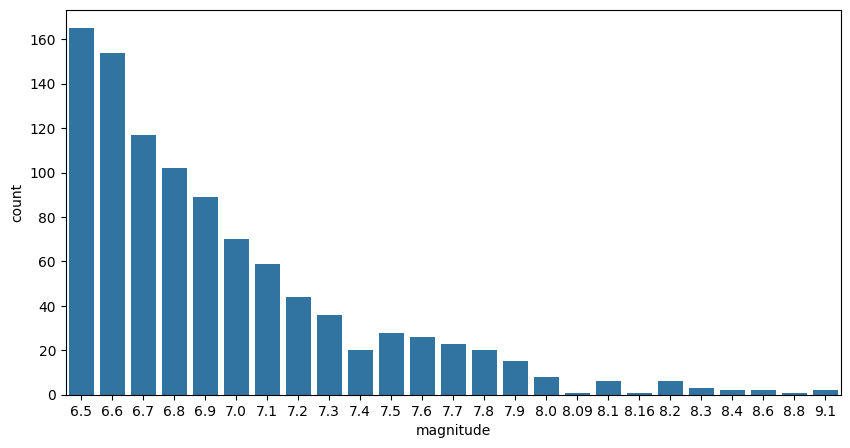

In [2836]:
plt.figure(figsize=(10,5))
sns.countplot(x='magnitude',data=df)
#Most earthquakes tend to be around 6.5 to 6.7 on the scale


Text(0.5, 1.0, 'TOP 15 terremotos x pais')

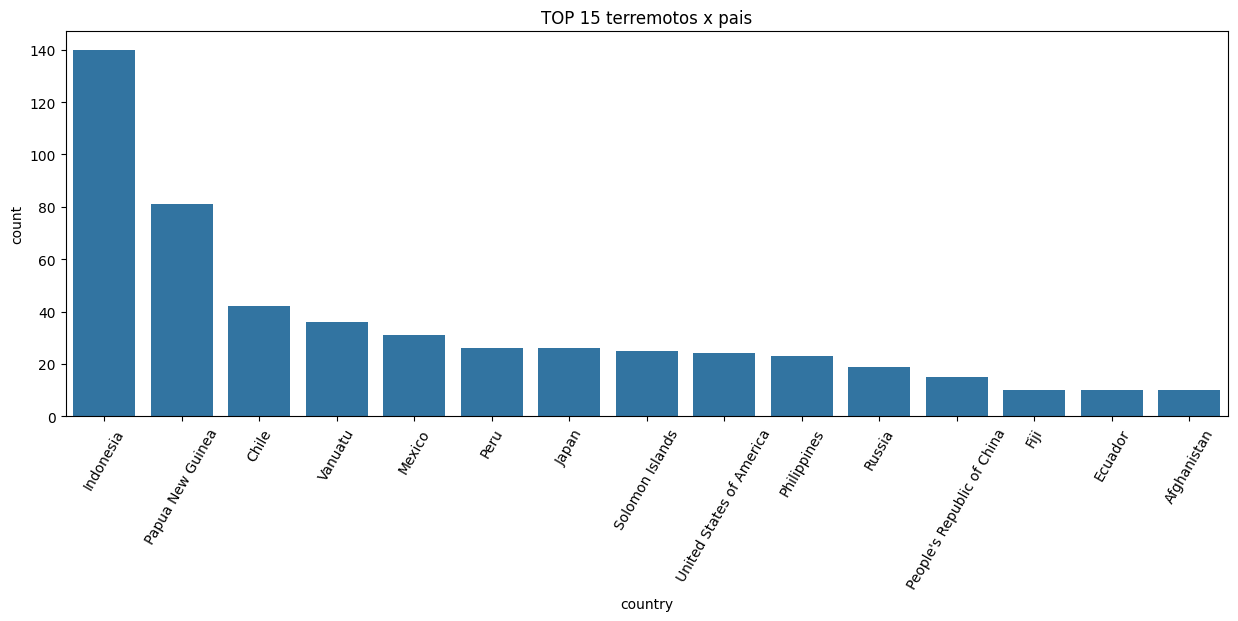

In [2837]:
o=df['country'].value_counts().head(15).index
plt.figure(figsize=(15,5))
sns.countplot(x='country',data=df,order=o)
plt.xticks(rotation=60)
plt.title('TOP 15 terremotos x pais')
#Indonesia has the highest number of earthquakes.

Text(0.5, 1.0, 'PROBABILIDAD DE TERREMOTO EN LOS 10 PAÍSES TOP ')

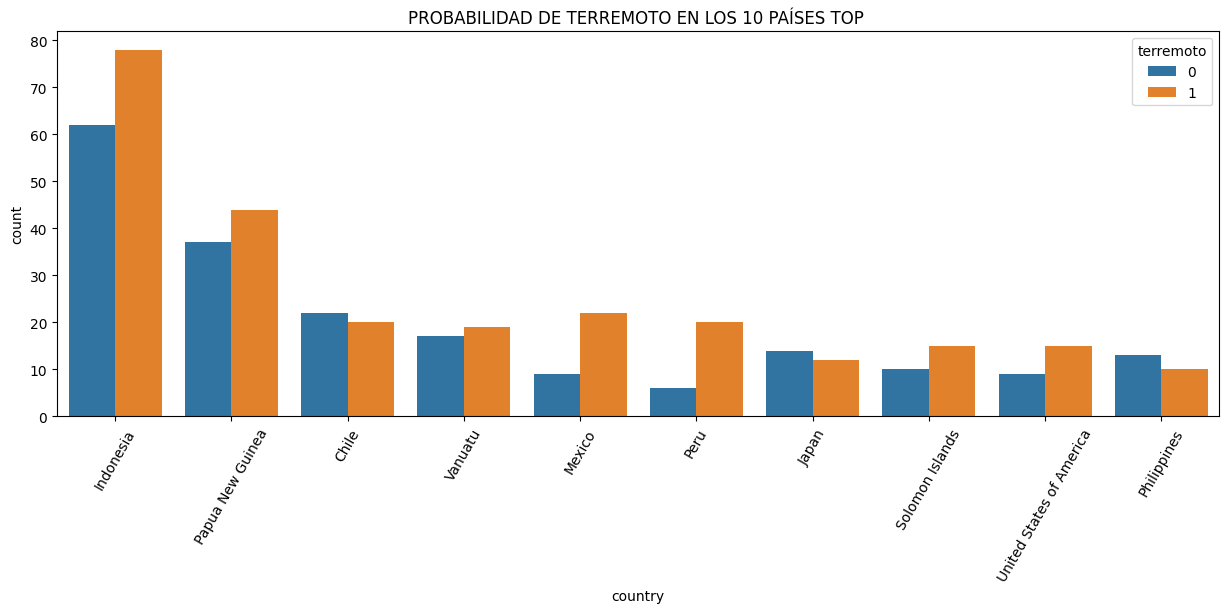

In [2838]:
o=df['country'].value_counts().head(10).index
plt.figure(figsize=(15,5))
sns.countplot(x='country',data=df,order=o,hue='terremoto')
plt.xticks(rotation=60)
plt.title('PROBABILIDAD DE TERREMOTO EN LOS 10 PAÍSES TOP ')
#Indonesia has the highest number of earthquakes worldwide, but Papua New Guinea and Philippines  has a very high risk of tsunamis following an earthquake.


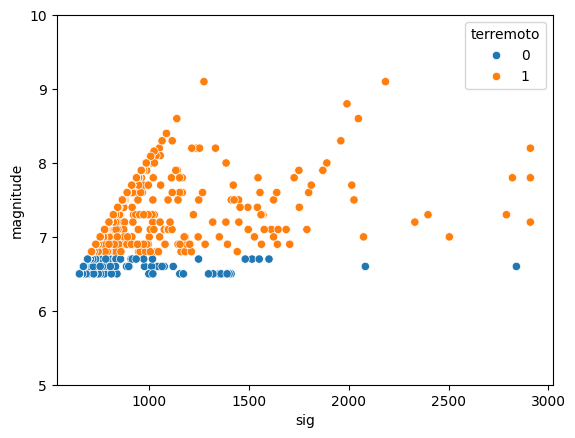

In [2839]:
sns.scatterplot(x='sig',y='magnitude',data=df,hue='terremoto')
plt.ylim(5, 10)  # Ajusta los límites según tus necesidades
plt.show()
#the higher the magnitude higher the chance of tsunami

Text(0.5, 1.0, 'Distribucion de terremotos')

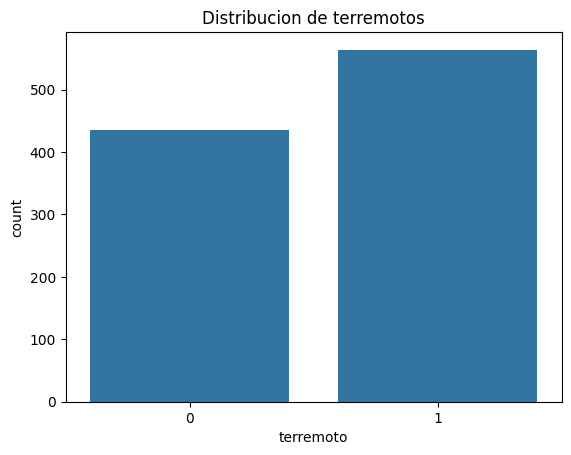

In [2840]:
sns.countplot(x='terremoto',data=df)
plt.title('Distribucion de terremotos')

<Axes: xlabel='Year', ylabel='count'>

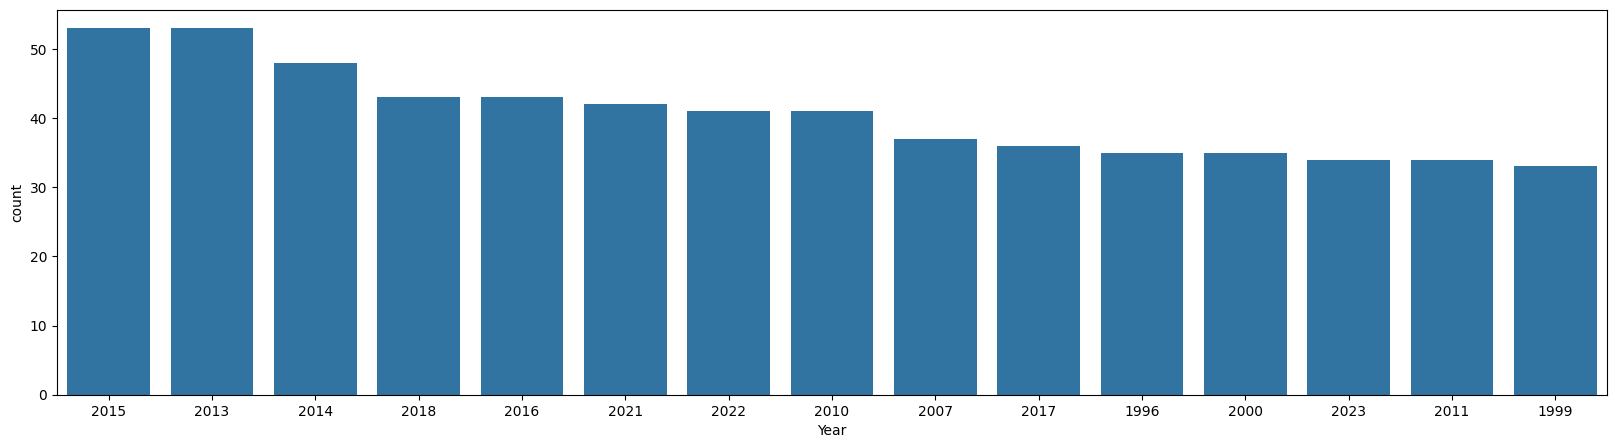

In [2841]:
plt.figure(figsize=(20,5))
o=df['Year'].value_counts().head(15).index
sns.countplot(x='Year',data=df,order=o)
#In 2015 and 2013, the world experienced the highest number of earthquakes.

Text(0.5, 1.0, 'NÚMERO DE TERREMOTOS OCURRIDOS EN MEXICO POR AÑO')

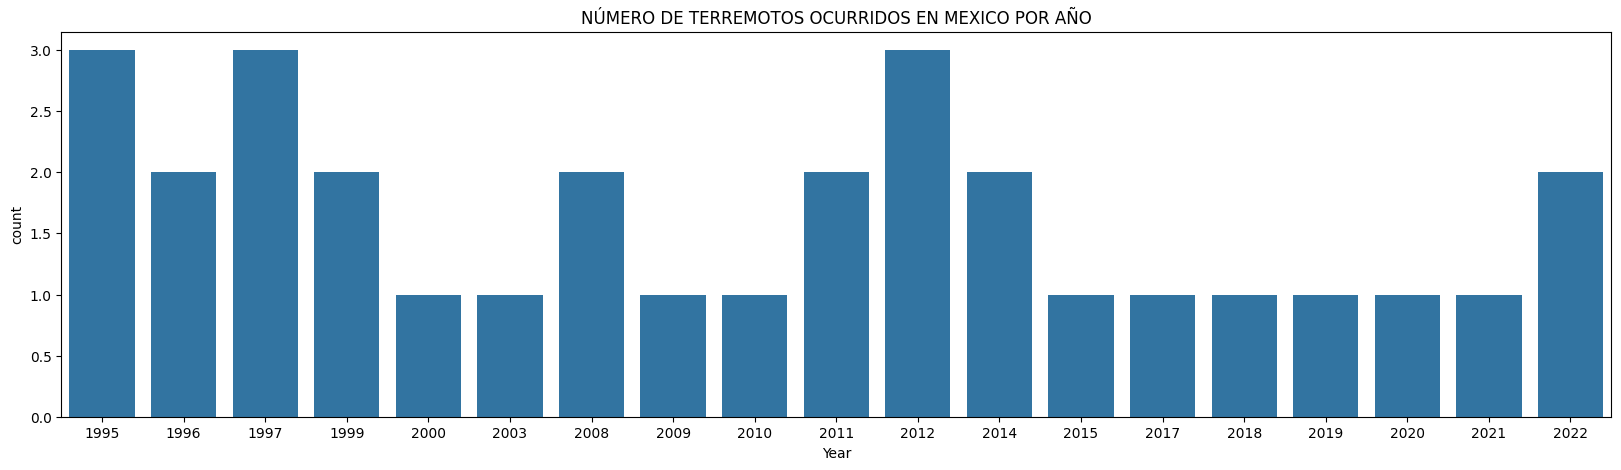

In [2842]:
Indo=df[df['country']=='Mexico']
plt.figure(figsize=(20,5))
sns.countplot(x='Year',data=Indo)
plt.title('NÚMERO DE TERREMOTOS OCURRIDOS EN MEXICO POR AÑO')
#Indonesia encountered 13 earthquic in the year 2007

In [2843]:
df.drop('country',axis=1,inplace=True)#we have latitude and longitude

In [2844]:
obj=df.select_dtypes(include=['object'])
obj.head()
#we can drop net because 95% of data contributed by US 

,net,magType
0,us,mww
1,us,mww
2,us,mww
3,us,mww
4,at,Mi


In [2845]:
obj.nunique()

net        11
magType     9
dtype: int64

In [2846]:
obj.drop('net',axis=1,inplace=True)
df.drop(['net','magType'],axis=1,inplace=True)

lr=LabelEncoder()
obj_lbl=obj.apply(lr.fit_transform)
df=pd.concat([df,obj_lbl],axis=1)
df.head()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude,terremoto,Year,Month,magType
0,6.5,7,4,0,657,114,7.177000,25.0,192.955,-13.8814,167.1580,0,2023,8,8
1,6.5,8,6,0,775,92,0.679000,40.0,69.727,12.8140,-88.1265,0,2023,7,8
2,6.6,7,5,0,899,70,1.634000,28.0,171.371,-38.1911,-70.3731,0,2023,7,8
3,7.2,6,6,1,860,173,0.907000,36.0,32.571,54.3844,-160.6990,1,2023,7,8
4,7.3,0,5,1,820,79,0.879451,172.8,21.000,54.4900,-160.7960,1,2023,7,0


<Axes: >

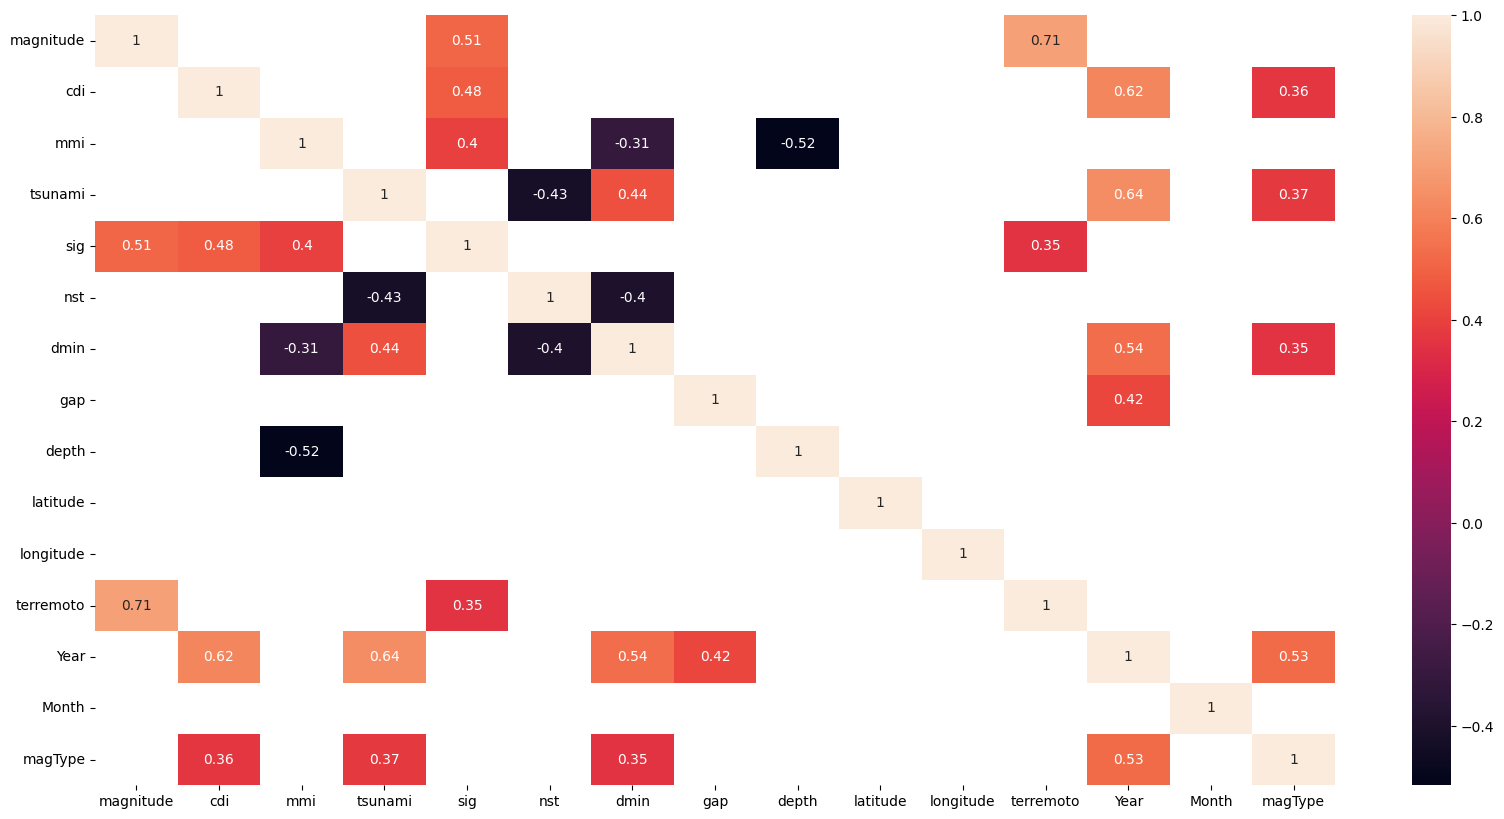

In [2847]:
d=df.corr()
d=d[(d>0.3) | (d<-0.3)]
plt.figure(figsize=(20,10))
sns.heatmap(d,annot=True)

In [2848]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  1000 non-null   float64
 1   cdi        1000 non-null   int64  
 2   mmi        1000 non-null   int64  
 3   tsunami    1000 non-null   int64  
 4   sig        1000 non-null   int64  
 5   nst        1000 non-null   int64  
 6   dmin       1000 non-null   float64
 7   gap        1000 non-null   float64
 8   depth      1000 non-null   float64
 9   latitude   1000 non-null   float64
 10  longitude  1000 non-null   float64
 11  terremoto  1000 non-null   int64  
 12  Year       1000 non-null   int32  
 13  Month      1000 non-null   int32  
 14  magType    1000 non-null   int64  
dtypes: float64(6), int32(2), int64(7)
memory usage: 109.5 KB


In [2849]:
print(df.columns)

Index(['magnitude', 'cdi', 'mmi', 'tsunami', 'sig', 'nst', 'dmin', 'gap',
       'depth', 'latitude', 'longitude', 'terremoto', 'Year', 'Month',
       'magType'],
      dtype='object')


In [2850]:
# Seleccionar variables (X) y objetivo (y)
#X = df.drop('sig', axis=1)  # Suponiendo que 'tsunami' es el objetivo
X = df[['magnitude', 'cdi', 'mmi',  'sig', 'nst', 'dmin', 'gap', 'depth', 'latitude', 'longitude', 'Year', 'Month', 'magType']]
y = df['terremoto']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Crear el modelo de regresión logística
model = LogisticRegression() 


In [2851]:

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test,
 y_pred)
print("Informe de Clasificación:\n", classification_report(y_test, y_pred))

Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.72      0.86      0.79       125
           1       0.89      0.77      0.82       175

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.82      0.81      0.81       300



In [2852]:
confusion_matrix(y_test, y_pred)

array([[108,  17],
       [ 41, 134]])

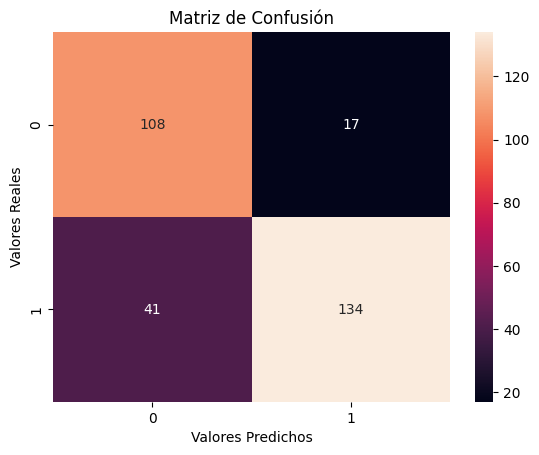

In [2853]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear la matriz de confusión (suponiendo que ya tienes y_test e y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Crear el gráfico de la matriz de confusión
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Matriz de Confusión')
plt.ylabel('Valores Reales')
plt.xlabel('Valores Predichos')
plt.show()

SCALING AND MODEL BUILDING

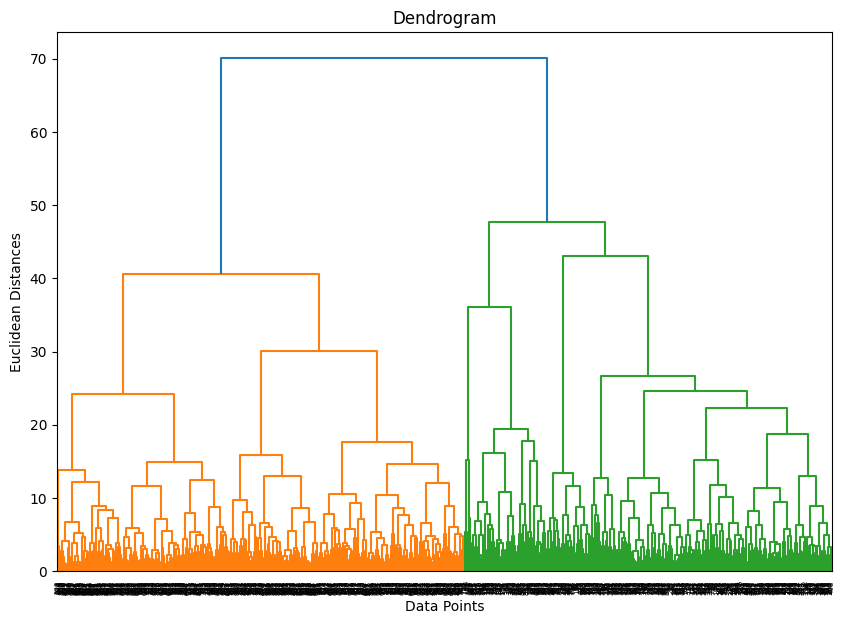

   magnitude  cdi  mmi  tsunami  sig  nst      dmin    gap    depth  latitude  \
0        6.5    7    4        0  657  114  7.177000   25.0  192.955  -13.8814   
1        6.5    8    6        0  775   92  0.679000   40.0   69.727   12.8140   
2        6.6    7    5        0  899   70  1.634000   28.0  171.371  -38.1911   
3        7.2    6    6        1  860  173  0.907000   36.0   32.571   54.3844   
4        7.3    0    5        1  820   79  0.879451  172.8   21.000   54.4900   

   longitude  terremoto  Year  Month  magType  Cluster  
0   167.1580          0  2023      8        8        0  
1   -88.1265          0  2023      7        8        0  
2   -70.3731          0  2023      7        8        0  
3  -160.6990          1  2023      7        8        0  
4  -160.7960          1  2023      7        0        2  


In [2855]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Perform hierarchical clustering
model = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters = model.fit_predict(data_scaled)

# Plot dendrogram to visualize the clustering
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

# Add cluster labels to the original dataset
df['Cluster'] = clusters

# Display the clustered data
print(df.head())

TRATAMIENTO CON DATOS DESBALANCEADOS

In [2856]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
from termcolor import colored
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2857]:
df = pd.read_csv("earthquake_1995-2023.csv")
data = df.copy()


There are 4 columns with missing values:
['alert' 'location' 'continent' 'country']



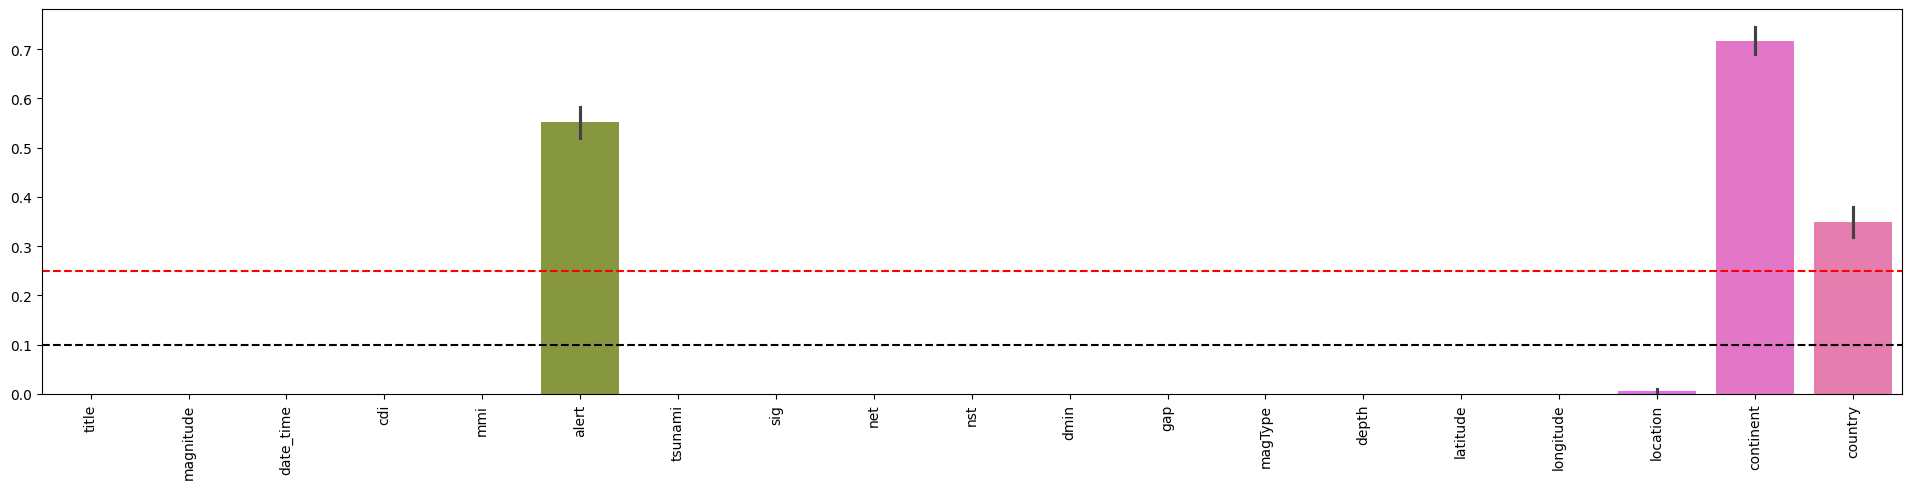

In [2858]:
_ = data.columns[data.isna().any()]
print(colored(f'\nThere are {len(_)} columns with missing values:', color='red', attrs=['bold', 'blink']))
print('{}\n'.format(_.values))

_, ax = plt.subplots(figsize=(24, 5))
sns.barplot(data=data.isna(), ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
ax.axhline(0.25, ls='--', c='r')
ax.axhline(0.1, ls='--', c='k')
_ = None

⚠️ A las columnas alerta, continente y país les falta más del 25% de sus valores. Sin embargo, los valores de los continentes se pueden inferir fácilmente, la alerta no se analizará en este cuaderno y el valor de cualquier país se puede encontrar en la columna de ubicación. Por lo tanto, según el criterio de valores faltantes, el conjunto de datos es lo suficientemente seguro y conciso como para utilizarlo en un análisis. La inferencia de datos se utilizará cuando sea necesario.